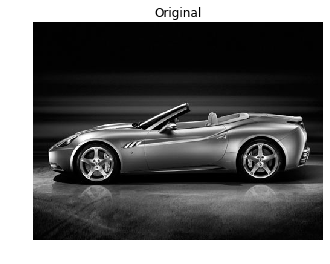

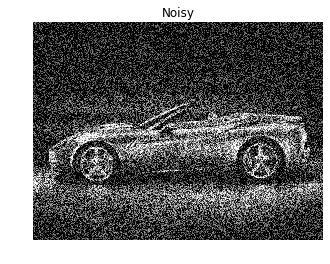

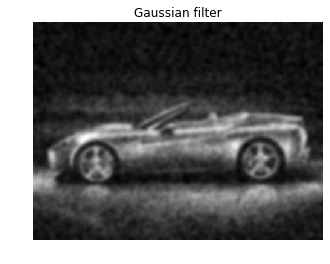

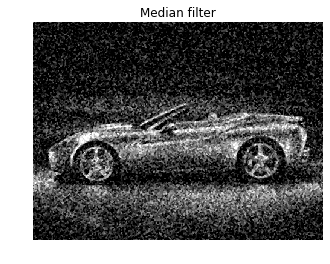

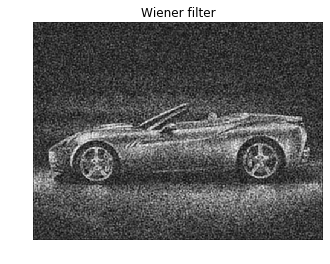

In [5]:
from scipy import ndimage
from scipy import signal
from matplotlib import pyplot as plt
from skimage import restoration
import numpy as np
from PIL import Image

img = Image.open('carpgm.pgm').convert('L')
noisy_img = Image.fromarray(np.clip(img + np.random.randint(-128, 128, (img.height, img.width)), 0, 255).astype(np.uint8))
blurred_img = ndimage.gaussian_filter(noisy_img, sigma=3)
median_img = ndimage.median_filter(noisy_img, size=3)

psf = np.ones((3, 3))
image = conv2(noisy_img, psf, 'same')
image += 0.1 * image.std() * np.random.standard_normal(image.shape)
wiener_img = restoration.wiener(image, psf, 1, clip=False)

plt.imshow(img, cmap=plt.cm.gray)
plt.axis('off')
plt.title('Original')
plt.show()

plt.imshow(noisy_img, cmap=plt.cm.gray)
plt.axis('off')
plt.title('Noisy')
plt.show()

plt.imshow(blurred_img, cmap=plt.cm.gray)
plt.axis('off')
plt.title('Gaussian filter')
plt.show()

plt.imshow(median_img, cmap=plt.cm.gray)
plt.axis('off')
plt.title('Median filter')
plt.show()

plt.imshow(wiener_img, cmap=plt.cm.gray)
plt.axis('off')
plt.title('Wiener filter')
plt.show()